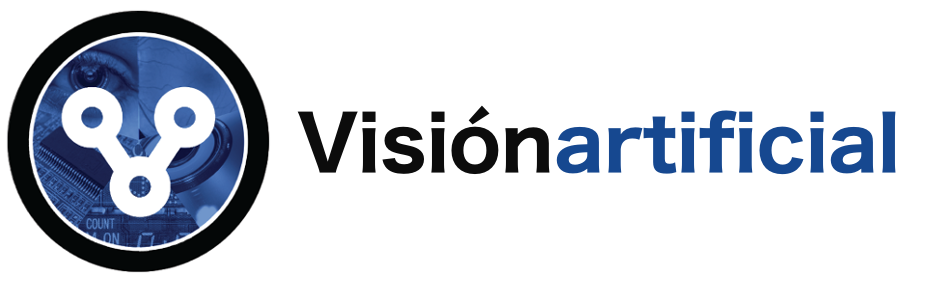

# OpenCV 

### para a materia de Visión Artificial do Grao de Robótica. EPSE de Lugo.

<h1 style="font-size:30px;">Histogramas de imaxes </h1>

Os histogramas de imaxes utilízanse principalmente como ferramenta de análise na visión por computador xa que cuantifican a distribución de datos asociados a unha imaxe (por exemplo, valores de intensidade dentro dunha imaxe). Neste caderno demostraremos como producir histogramas de imaxes e como interpretar as tramas. Tamén trataremos o tema da igualación do histograma (ecualización) que pode axudar a mellorar o contraste en imaxes mal iluminadas. Como verás, os resultados adoitan ser sorprendentes.

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'

# 1. Introdución aos histogramas

Os histogramas recollen os recontos de datos organizados nun conxunto de contedores predefinidos. Cando achamos histogramas, precisamos especificar o número de contedores ao longo do eixo x que representa un intervalo de valores de intensidades de píxeles: 0-9, 10-19, 20-29, etc. A continuación veremos varios exemplos que axudarán a asentar este concepto.

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font color="green">Sintaxe da función </font>
``` python
retval = plt.hist(x[, bins[, range[, ...]]])
```

`retval`: Matriz de datos para realizar o histograma. Tamen pode ser secuencia de matrices [datos1, datos2, ...]. O tipo da matriz sempre será flotante aínda que non se utilice ningunha ponderación ou normalización.

A función ten **1 argumento de entrada obrigatorio** e varios indicadores opcionais:

1. `x`: matriz ou secuencia de matrices para realizar o histograma.
2. `bins`: define o número de intervalos nos que se mostrea o rango de datos. Este é un **argumento opcional** cun valor predeterminado de 10.
2. `range`: o rango inferior e superior dos intervalos. Este é un **argumento opcional** cun valor predeterminado de None, equivalente a usar todo o rango dos datos de entrada `x`.


### <font color="green">Documentación de OpenCV</font>

[**`histogram tutorial`**](https://docs.opencv.org/4.5.2/d8/dbc/tutorial_histogram_calculation.html)

### <font color="green">Documentación de Matplotlib/Numpy</font>

[**`zeros()`**](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html)
[**`ravel()`**](https://numpy.org/doc/stable/reference/generated/numpy.ravel.html)
[**`hist()`**](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font style="color:rgb(50,120,230)">Creamos un histograma dunha imaxe negra</font>

Text(0.5, 1.0, 'Histograma dunha imaxe negra')

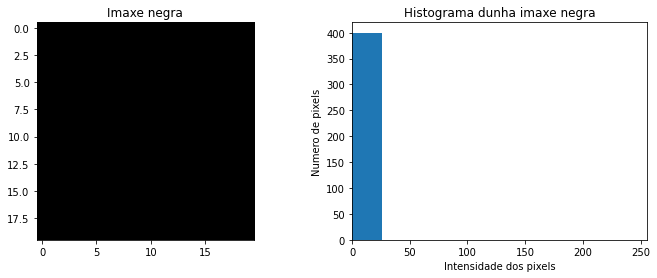

In [5]:
# Creamos un array de dimensions 20x20x1 rechea de zeros.
black_img = np.zeros([20, 20, 1])

# Aplanamos os datos da imaxe nun array 1D.
black_flatten = black_img.ravel()

# Visualizamos a imaxe e o histograma.
plt.figure(figsize=[18, 4])

plt.subplot(131); plt.imshow(black_img); plt.title('Imaxe negra')

plt.subplot(132) 
plt.hist(black_flatten, range = [0, 256])
plt.xlim([0, 256])
plt.xlabel('Intensidade dos pixels')
plt.ylabel('Numero de pixels')
plt.title('Histograma dunha imaxe negra')

### <font style="color:rgb(50,120,230)">Explicación </font>

Usando a función de ceros de numpy, podemos xerar facilmente unha imaxe negra. Técnicamente é unha imaxe en escala de grises cun único valor, incluíndo un total de 400 píxeles. A continuación, creamos un histograma desta imaxe usando o número predeterminado de contedores (10) e especificamos que o histograma debería crear estes contedores de xeito uniforme a través de valores de intensidade de 0 a 256. O extremo superior deste intervalo non se inclúe, polo que o o histograma pode mostrar en última instancia calquera intensidade de píxel ata un valor de 255 incluído.

As barras verticais do histograma representan o número total de píxeles cun valor de intensidade que se atopa dentro dese colector en particular. Vendo o histograma resultante dunha imaxe puramente negra, atopamos que todos os valores mapeados no primeiro colector. Tamén podemos ver que o número total de píxeles (400) equivale exactamente ao reconto de píxeles do valor y nesta primeira papeleira, relacionado co tamaño da imaxe 20x20 que xeramos.

### <font style="color:rgb(50,120,230)">Histrograma dunha imaxe binaria</font>

Text(0.5, 1.0, '5o contedores (Bins)')

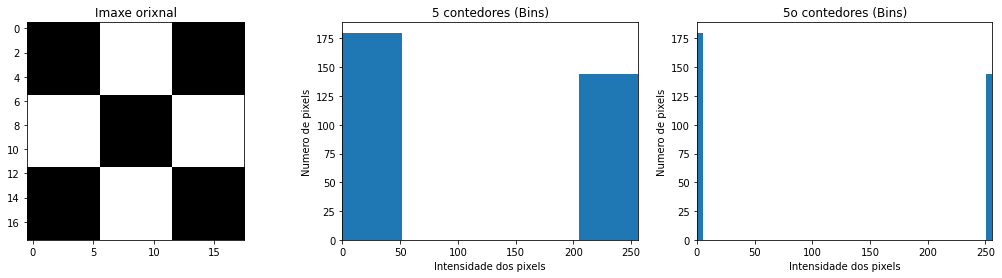

In [27]:
# Lemos a imae.
img = cv2.imread('./data/checkerboard_18x18.png', cv2.IMREAD_GRAYSCALE)

# Aplanamos a imaxe nun array 1D.
img_flatten = img.ravel()

# Visualizamos as imaxes e os histogramas
plt.figure(figsize = [18, 4])

plt.subplot(131); plt.imshow(img); plt.title('Imaxe orixnal')

plt.subplot(132) 
plt.hist(img_flatten, 5, [0, 256])
plt.xlim([0, 256])
plt.xlabel('Intensidade dos pixels')
plt.ylabel('Numero de pixels')
plt.title('5 contedores (Bins)')

plt.subplot(133)
plt.hist(img_flatten, 50, [0, 256])
plt.xlim([0, 256])
plt.xlabel('Intensidade dos pixels')
plt.ylabel('Numero de pixels')
plt.title('5o contedores (Bins)')

### <font style = "color: rgb (50,120,230)"> Explicación </font>

A imaxe de xadrez é de 18x18 píxeles, polo que o número total de píxeles na imaxe é de 324. Ademais, as intensidades dos píxeles son só 0 (negro) ou 255 (branco). Os gráficos do histograma á dereita mostran a distribución das intensidades dos píxeles. Cando trazamos histogramas, é útil especificar o número de contedores (bins) ao longo do eixo x. O primeiro histograma ten 5 e o segundo histograma ten 50. Dado que estamos trazando a distribución das intensidades de píxeles, o eixo x varía de 0 a 255. Así, o ancho dos internvalos na primeira gráfica é 51 e na segunda gráfica é 5,1 (non enteiro).

Neste exemplo, a altura da barra á esquerda de cada trazado é 180. Isto significa que hai 180 píxeles con intensidades no rango indicado. Dado que as intensidades desta imaxe son 0 ou 255, o ancho do contedor (5.1 ou 51) non importa porque ámbolos rangos inclúen o valor de 0. Do mesmo xeito, o número total de píxeles brancos (144) coincide coa altura da barra na gráfica da dereita (144), posto que os últimos contedores conteñen o valor de 255.

Os histogramas revelan que a relación entre os cadrados branco e negro é de 5:4 (ou 180:144). Paga a pena resaltar que os histogramas deste tipo non conteñen información espacial sobre a imaxe.

Seleccionar un tamaño de contedor particular ten que ver coa granularidade, pero para as imaxes é moi común establecer o número de contedores en 256, o que equivale a un ancho de contedor de 1.

### <font style="color:rgb(50,120,230)">Crear un histograma a partir dunha imaxe en escala de grises (exemplo 1) </font>

Text(0.5, 1.0, '50 Bins')

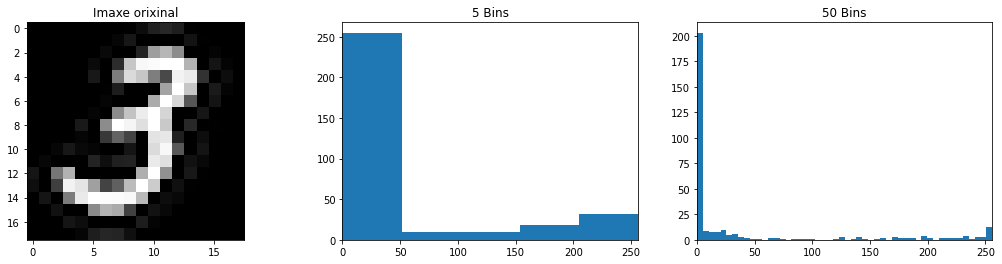

In [28]:
# Ler a imaxe
img = cv2.imread('./data/MNIST_3_18x18.png', cv2.IMREAD_GRAYSCALE)

# Aplanamos a imaxe nun array 1D.
img_flatten = img.ravel()

# Visualizamos os datos
plt.figure(figsize = [18, 4])

plt.subplot(131); plt.imshow(img); plt.title('Imaxe orixinal')
plt.subplot(132); plt.hist(img_flatten, 5, [0, 256]);  plt.xlim([0, 256]); plt.title('5 Bins')
plt.subplot(133); plt.hist(img_flatten, 50, [0, 256]); plt.xlim([0, 256]); plt.title('50 Bins')

### <font style="color:rgb(50,120,230)">Crea un histograma a partir dunha imaxe en escala de grises (exemplo 2) </font>

Text(0.5, 1.0, '256 Bins')

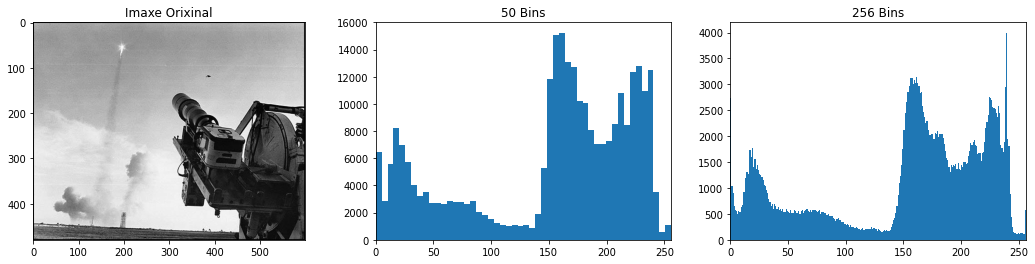

In [13]:
# Lemos a imaxe
img = cv2.imread('./data/Apollo-8-Launch.jpg', cv2.IMREAD_GRAYSCALE)

# Aplanamos a imaxe nun array 1D.
img_flatten = img.ravel()

# Visualizacion
plt.figure(figsize = [18, 4])
plt.subplot(131); plt.imshow(img); plt.title('Imaxe Orixinal')
plt.subplot(132); plt.hist(img_flatten, 50, [0,256]);  plt.xlim([0, 256]); plt.title('50 Bins')
plt.subplot(133); plt.hist(img_flatten, 256, [0,256]); plt.xlim([0, 256]); plt.title('256 Bins')

### <font style="color:rgb(50,120,230)">Compara calcHist() con plt.hist()</font>


<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font color="green">Sintaxe da Función </font>

```python
    hist = cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
```

Esta función ten **5 argumentos necesarios**:

1. `images`: Imaxes de entrada. Todas deben ter a mesma profundidade, CV_8U, CV_16U ou CV_32F, e o mesmo tamaño. Cada unha delas pode ter un número arbitrario de canles.

2. `channels`: lista das canles usadas para calcular o histograma.

3. `mask`: máscara opcional. Se a matriz non está baleira, debe ser unha matriz de 8 bits do mesmo tamaño que as images. Os elementos de máscara distintos de cero marcan os elementos da matriz contados no histograma.

4. `histSize`: matriz de tamaños de histogramas en cada dimensión.


### <font color="green">Documentación de OpenCV</font>


[**`calcHist()`**](https://docs.opencv.org/4.5.2/d6/dc7/group__imgproc__hist.html#ga4b2b5fd75503ff9e6844cc4dcdaed35d)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

Text(0.5, 1.0, 'np.ravel(), plt.hist()')

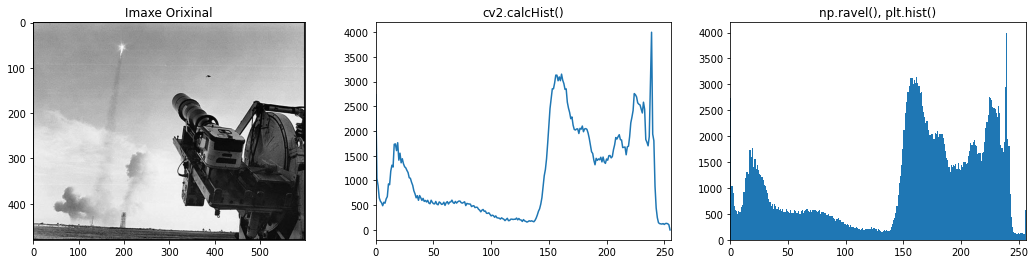

In [14]:
# Lemos a imaxe
img = cv2.imread('./data/Apollo-8-Launch.jpg', 0)

# Usamos calcHist() en OpenCV.
hist = cv2.calcHist(images = [img], channels = [0], mask = None, histSize = [256], ranges = [0,255])

# Aplanado da imaxe
img_flatten = img.ravel()

# Visualizacipn
plt.figure(figsize = [18, 4])
plt.subplot(131); plt.imshow(img); plt.title('Imaxe Orixinal')
plt.subplot(132); plt.plot(hist); plt.xlim([0, 256]); plt.title('cv2.calcHist()')
plt.subplot(133); plt.hist(img_flatten,256,[0,256]); plt.xlim([0, 256]); plt.title('np.ravel(), plt.hist()')

### <font style="color:rgb(50,120,230)">Diferentes imaxes con mesmo histograma</font>

Text(0.5, 1.0, 'Hoistograma da imaxe ruidosa')

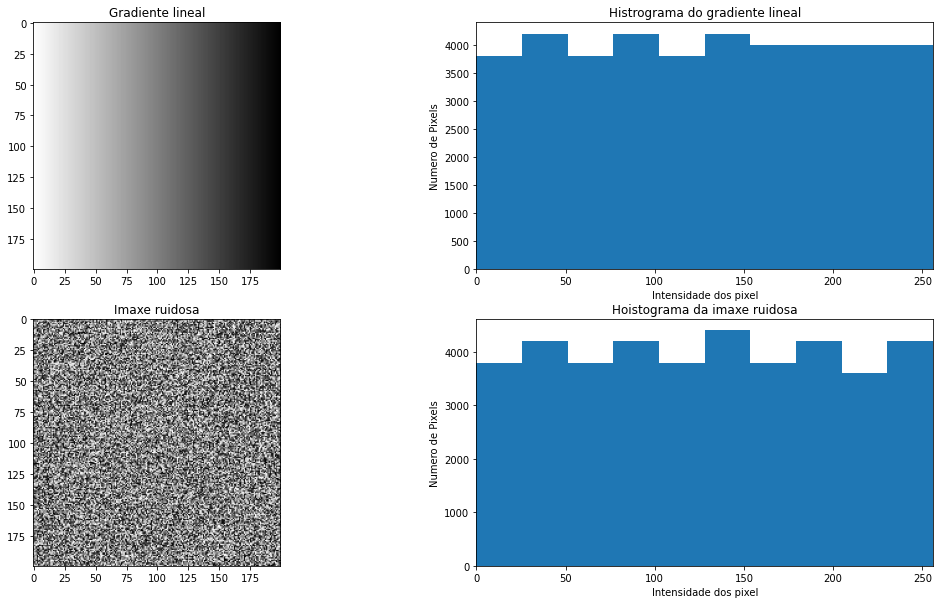

In [18]:
# Cargamos duas imaxe.
img_gradient = cv2.imread('./data/linear_graident.png', cv2.IMREAD_GRAYSCALE)
img_noisy = cv2.imread('./data/noisy.png', cv2.IMREAD_GRAYSCALE)

# Aplanado da imaxe
gradient_flatten = img_gradient.ravel()
noisy_flatten = img_noisy.ravel()

# Visualizacion
plt.figure(figsize = [18, 10])

plt.subplot(221); plt.imshow(img_gradient); plt.title('Gradiente lineal')

plt.subplot(222) 
plt.hist(gradient_flatten, range = [0, 256])
plt.xlim([0, 256])
plt.xlabel('Intensidade dos pixel')
plt.ylabel('Numero de Pixels')
plt.title('Histrograma do gradiente lineal');

plt.subplot(223); plt.imshow(img_noisy); plt.title('Imaxe ruidosa')

plt.subplot(224) 
plt.hist(noisy_flatten, range = [0, 256])
plt.xlim([0, 256])
plt.xlabel('Intensidade dos pixel')
plt.ylabel('Numero de Pixels')
plt.title('Hoistograma da imaxe ruidosa')

### <font style="color:rgb(50,120,230)">Explicación </font>

É importante entender o que os histogramas poden e non poden dicirnos. En dúas imaxes moi diferentes teñen histogramas idénticos, cunha distrubución aproximada de píxeles en cada rango (bin). Só porque dúas imaxes teñan histogramas idénticos, non significa que sexan iguais. 

# 2. Histogramas de cor

(0.0, 200000.0)

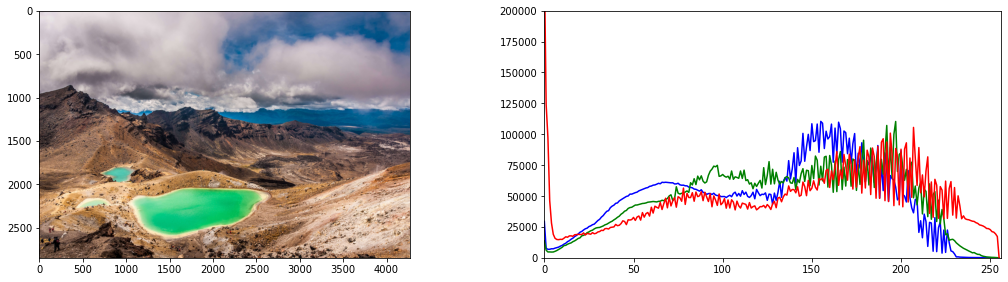

In [19]:
# Lemos as imaxes de cor
img = cv2.imread('./data/Emerald_Lakes_New_Zealand.jpg')

# Histragramas para cada banda de cor
hist1 = cv2.calcHist([img], [0], None, [256], [0, 255])
hist2 = cv2.calcHist([img], [1], None, [256], [0, 255])
hist3 = cv2.calcHist([img], [2], None, [256], [0, 255])

# Visualizacion
plt.figure(figsize = [18, 10])
plt.subplot(221); plt.imshow(img[:, :, ::-1])

plt.subplot(222) 
plt.plot(hist1, 'b'); plt.plot(hist2, 'g'); plt.plot(hist3, 'r') 
plt.xlim([0, 256])
plt.ylim([0, 200000])

### <font style="color:rgb(50,120,230)">Empregando unha mascara con calcHist()</font>

(0.0, 10000.0)

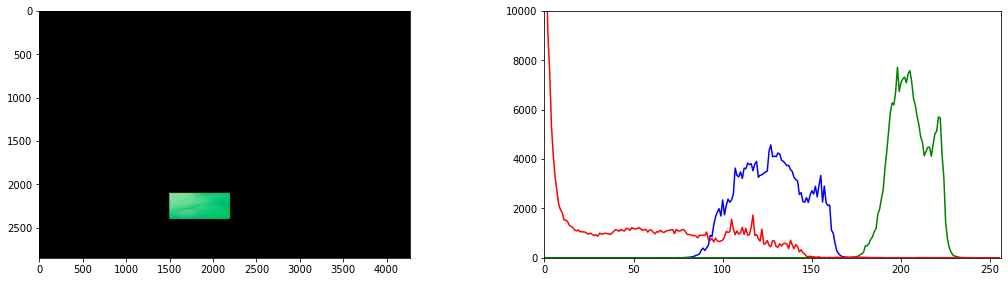

In [21]:
# Lemos as imaxes.
img = cv2.imread('./data/Emerald_Lakes_New_Zealand.jpg')

# Creamos unha mascara para filtrar unha imaxe para calculo de histograma.
mask_hist = np.zeros((img.shape[0], img.shape[1]), dtype = 'uint8')

# Selecionamos a rexion para illar o lago
mask_hist[2100:2400, 1500:2200] =  255

# Crea unha máscara similar para mostrar a rexión seleccionada na imaxe (só para fins de visualización).
# A máscara debe ter o mesmo número de canles de cor que a imaxe, pero cada canle de cor terá
# conter a mesma información. 
mat = [mask_hist, mask_hist, mask_hist]
mask_3ch = cv2.merge(mat, 3)

# Crea unha imaxe que só amose a rexión de interese seleccionada. 
img_roi = cv2.bitwise_and(img, mask_3ch)

# Calculamos histogramas para cada canle de cor para ambas as imaxes. 
hist1_lake = cv2.calcHist([img], [0], mask_hist, [256], [0, 255])
hist2_lake = cv2.calcHist([img], [1], mask_hist, [256], [0, 255])
hist3_lake = cv2.calcHist([img], [2], mask_hist, [256], [0, 255])

# Visualizacion
plt.figure(figsize = [18, 10])
plt.subplot(223); plt.imshow(img_roi[:, :, ::-1])
plt.subplot(224); plt.plot(hist1_lake, 'b'); plt.plot(hist2_lake, 'g'); plt.plot(hist3_lake, 'r') 
plt.xlim([0, 256])
plt.ylim([0, 10000])

# 3. Igualación do histograma
Un histograma de imaxe é unha representación gráfica da distribución tonal dos datos. Cada histograma é simplemente unha matriz con 256 bins e cada bin contén o número de píxeles con esa intensidade.
A igualación do histograma é un método non lineal para mellorar o contraste nunha imaxe. Vexamos como realizar a ecualización do histograma en OpenCV usando [**`equalizeHist()`**](https://docs.opencv.org/4.1.0/d6/dc7/group__imgproc__hist.html#ga7e54091f0c937d49bf84152a16f76d6e). 

## 3.1 Ecualización de histogramas en imaxes de gris</font>

A función `equalizeHist()` realiza a igualación do histograma nunha imaxe en escala de grises. A sintaxe dáse a continuación. 

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font color="green">Sintaxe da Función </font>

```python
	dst = cv2.equalizeHist(src[, dst])
```

**Parameters**

- **`src`**:	Imaxe de canle de 8 bits de orixe. 
- **`dst`**:	Imaxe de destino do mesmo tamaño e tipo que src. 

### <font color="green">Documentación OpenCV </font>


[**`equalizeHist()`**](https://docs.opencv.org/4.1.0/d6/dc7/group__imgproc__hist.html#ga7e54091f0c937d49bf84152a16f76d6e)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

Text(0.5, 1.0, 'Imaxe Orixinal')

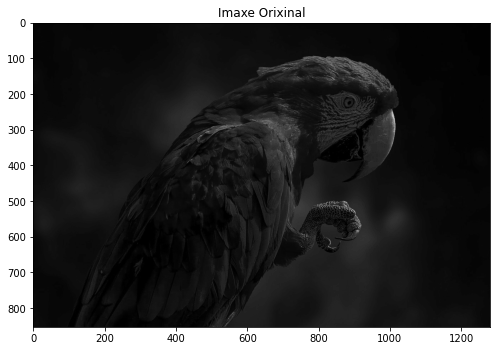

In [22]:
# Lemos a imaxe de gris
img = cv2.imread('./data/parrot.jpg', cv2.IMREAD_GRAYSCALE)

# Visualizamos
plt.figure(figsize = (18, 6))
plt.subplot(121); plt.imshow(img); plt.title('Imaxe Orixinal')


Text(0.5, 1.0, 'Histograma ecualizada')

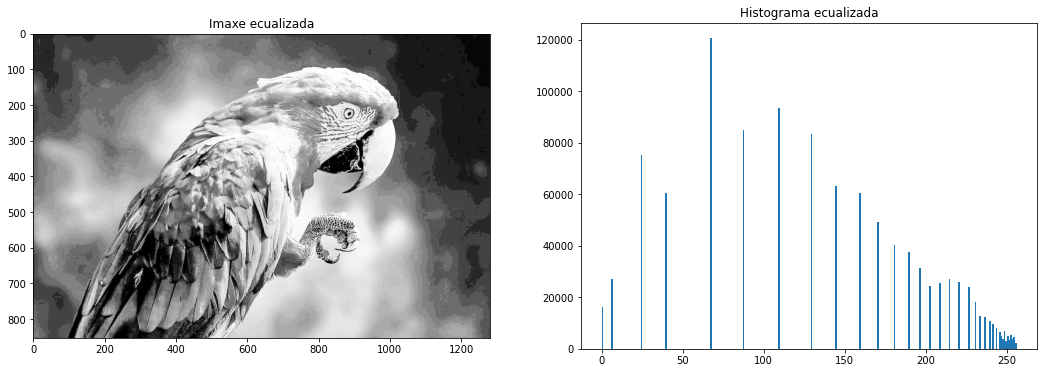

In [23]:
# Lemos a imaxe
img = cv2.imread('./data/parrot.jpg', cv2.IMREAD_GRAYSCALE)

# Ecualizamos o histograma
img_eq = cv2.equalizeHist(img)

# Visualizacion
plt.figure(figsize = (18, 6))
plt.subplot(121); plt.imshow(img_eq); plt.title('Imaxe ecualizada')
plt.subplot(122); plt.hist(img_eq.ravel(), 256, [0, 256]); plt.title('Histograma ecualizada')

Como era de esperar, o histograma repártese de xeito máis uniforme no rango 

## 3.2 Igualación do histograma para imaxes en cor </font>

Para imaxes en cor, non podemos aplicar a igualación do histograma nas canles R, G, B por separado. Para entender por que non é moi boa idea, botemos un ollo a un exemplo.

### <font style="color:rgb(50,120,230)">Forma incorrecta</font>

Text(0.5, 1.0, 'Imaxe ecualizada')

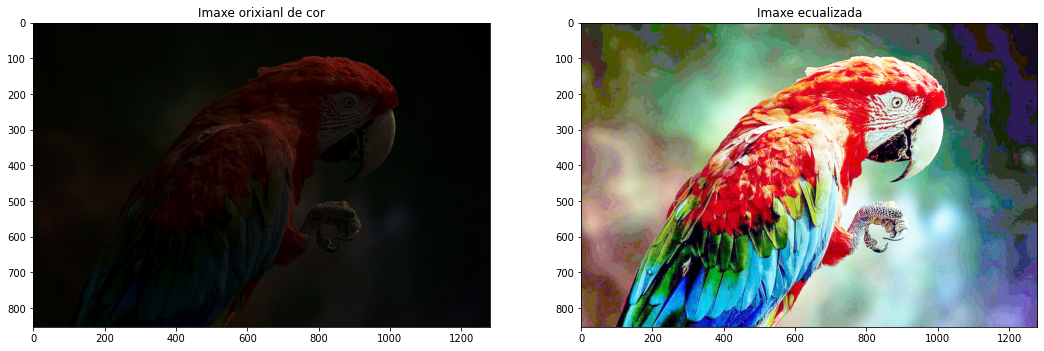

In [24]:
# Lemos a imaxe decor
img = cv2.imread('./data/parrot.jpg')
img_eq = np.zeros_like(img)

# Ecualizacion de cada canle por separado
for i in range(0, 3):
    img_eq[:, :, i] = cv2.equalizeHist(img[:, :, i])

# Visualizacion
plt.figure(figsize = (18, 6))
plt.subplot(121); plt.imshow(img[:, :, ::-1]); plt.title('Imaxe orixianl de cor')
plt.subplot(122); plt.imshow(img_eq[:, :, ::-1]); plt.title('Imaxe ecualizada')

### <font style="color:rgb(50,120,230)">Forma correcta</font>

Acabamos de ver que a igualación do histograma realizada nas tres canles por separado leva a resultados pobres. A razón é que cando cada canle de cor se transforma de forma non lineal independentemente, pode obter cores completamente novas e non relacionadas.

O xeito correcto de realizar a igualación do histograma en imaxes en cor é transformar as imaxes nun espazo como o espazo de cores ** HSV ** onde as cores están separadas da intensidade.

** FLUXO DE TRABALLO **

1. Transforma a imaxe ao espazo de cores HSV.
2. Realice a ecualización do histograma só na canle V.
3. Transforma a imaxe de novo ao espazo de cores RGB.

Text(0.5, 1.0, 'Imaxe ecualizada')

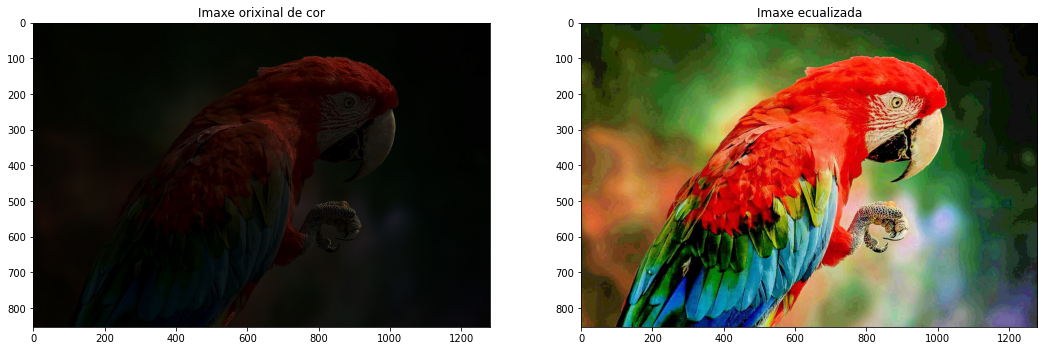

In [25]:
# Lemos a imaxe
img = cv2.imread('./data/parrot.jpg', cv2.IMREAD_COLOR)

# Convertemos a HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Ecualizamos somanete a canle V para o valor de intensidade.
img_hsv[:,:,2] = cv2.equalizeHist(img_hsv[:, :, 2])

# Retornamos ao formato BGR.
img_eq = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR)

# Visualizamos
plt.figure(figsize = (18, 6))
plt.subplot(121); plt.imshow(img[:, :, ::-1]); plt.title('Imaxe orixinal de cor')
plt.subplot(122); plt.imshow(img_eq[:, :, ::-1]); plt.title('Imaxe ecualizada')

Text(0.5, 1.0, 'Histograma ecualizado')

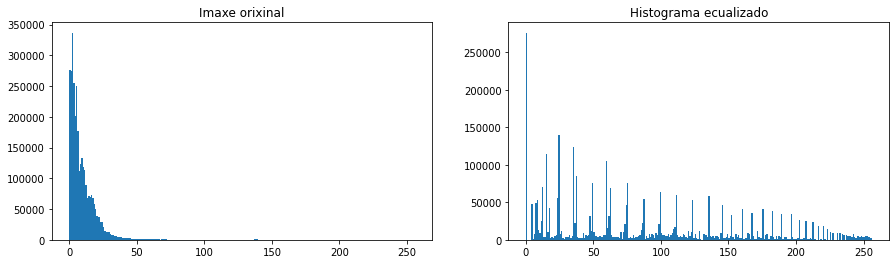

In [26]:
#Visualizamos os histogramas
plt.figure(figsize = [15,4])
plt.subplot(121); plt.hist(img.ravel(),256,[0,256]); plt.title('Imaxe orixinal')
plt.subplot(122); plt.hist(img_eq.ravel(),256,[0,256]); plt.title('Histograma ecualizado')

## <font style = "color: rgb (50,120,229)"> Contraste limitado de adaptación do histograma de igualación (CLAHE) </font>

A igualación do histograma usa os píxeles de toda a imaxe para mellorar o contraste. Aínda que isto poida parecer bo en moitos casos, ás veces é posible que queiramos mellorar o contraste localmente para que a imaxe pareza máis natural e menos "amañada".

Para tales aplicacións, usamos [Contrast Limited Adaptive Histogram Equalization (CLAHE)] (https://docs.opencv.org/4.1.0/d5/daf/tutorial_py_histogram_equalization.html)) que mellora o contraste local. Máis importante aínda, permítenos especificar o tamaño do vecindario que se considera "local".

Escollamos unha imaxe diferente, onde podemos preferir CLAHE en lugar da igualación regular do histograma. 

(-0.5, 666.5, 999.5, -0.5)

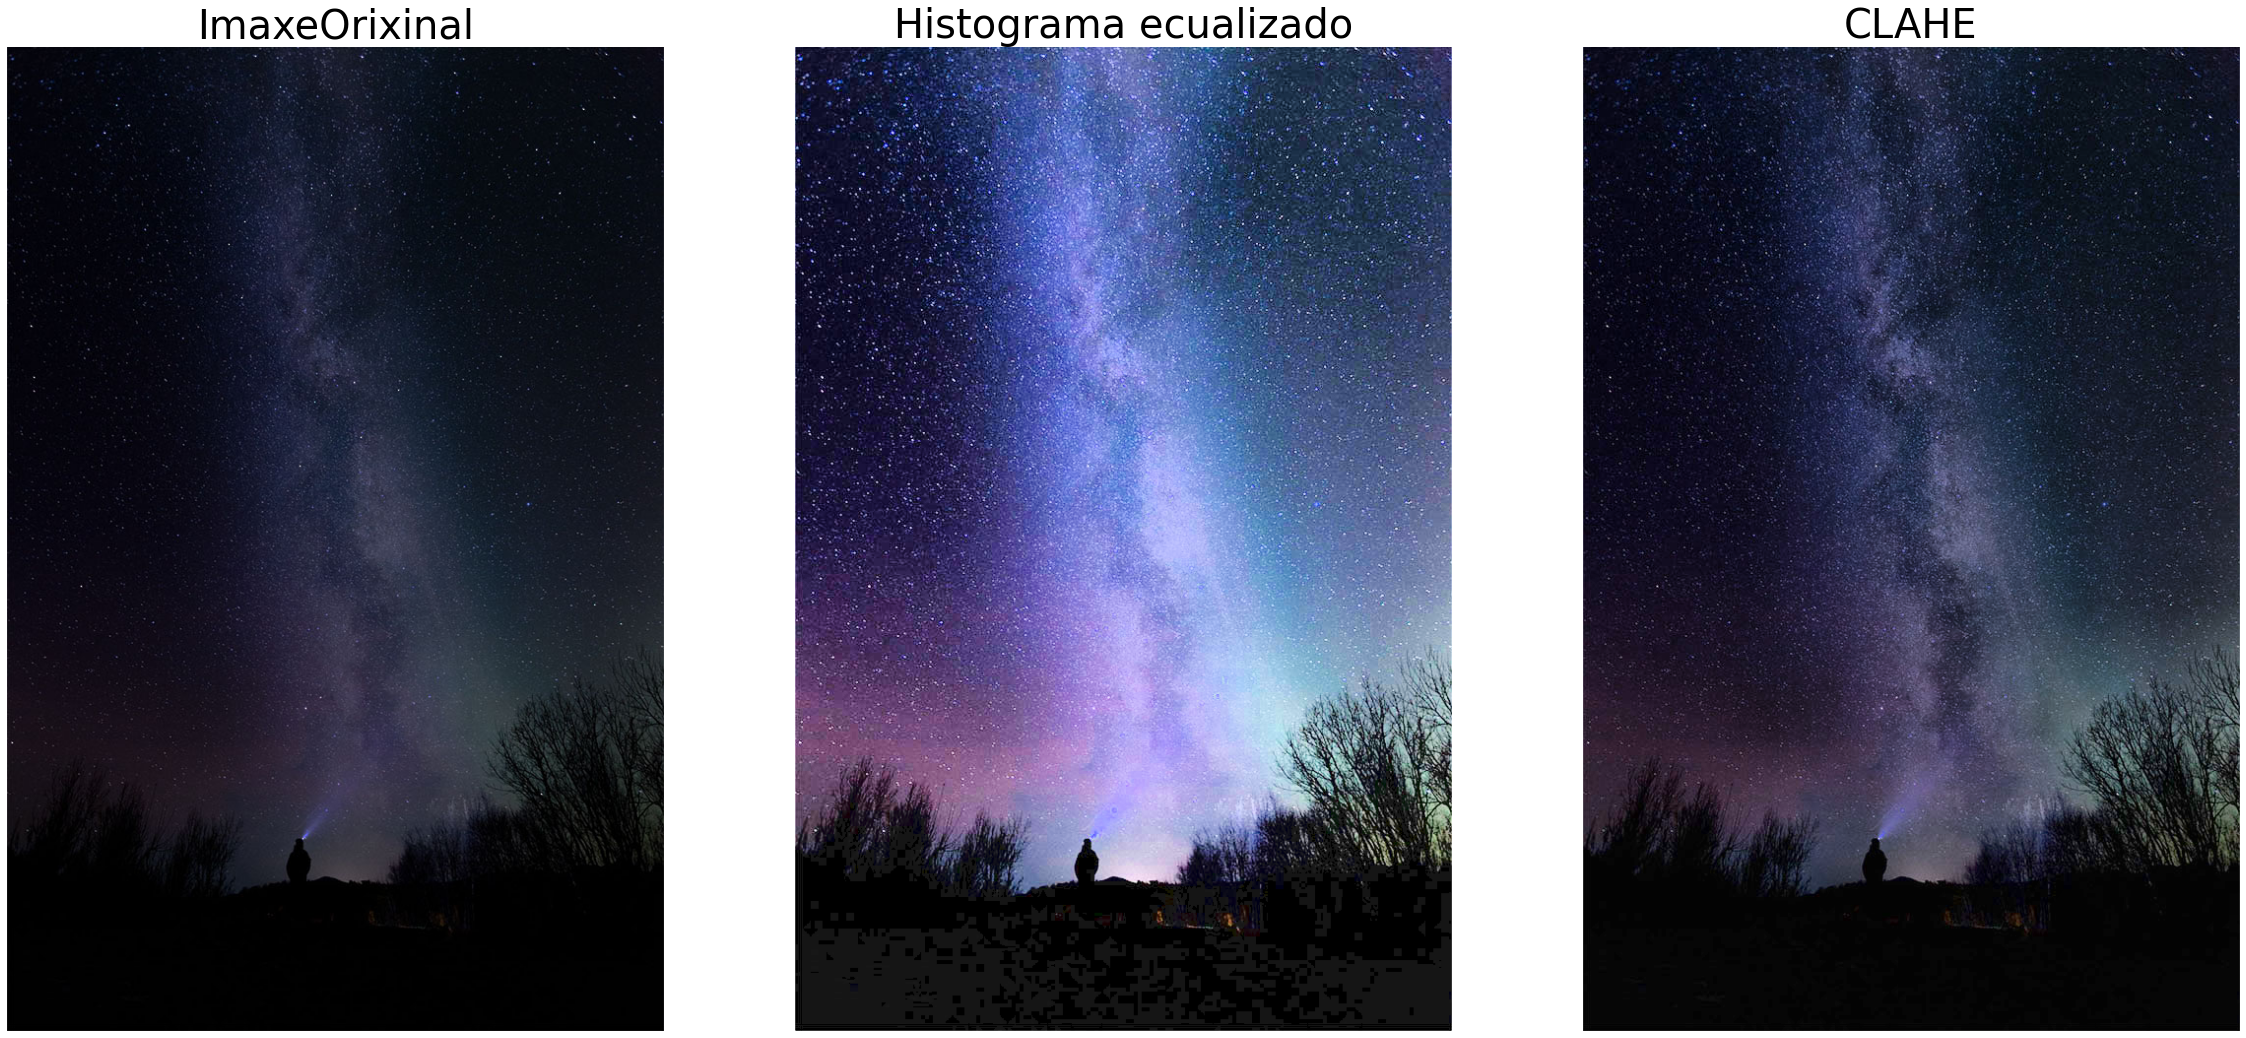

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#Reconfiguramos as opcion de matplotlib
import matplotlib
matplotlib.rcParams['figure.figsize'] = (50.0, 50.0)
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['axes.titlesize'] = 40
matplotlib.rcParams['image.interpolation'] = 'bilinear'

# Lemos a imaxe de cor
filename = "./data/night-sky.jpg"
im = cv2.imread(filename)

# Convertemos a HSV 
imhsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
imhsvCLAHE = imhsv.copy()

# Ecualizamos so a canle V 
imhsv[:,:,2] = cv2.equalizeHist(imhsv[:,:,2])

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
imhsvCLAHE[:,:,2] = clahe.apply(imhsvCLAHE[:,:,2])

# Retornamos ao espazo BGR 
imEq = cv2.cvtColor(imhsv, cv2.COLOR_HSV2BGR)
imEqCLAHE = cv2.cvtColor(imhsvCLAHE, cv2.COLOR_HSV2BGR)


#Visualizamos as imaxes
plt.figure(figsize=(40,40))

ax = plt.subplot(1,3,1)
plt.imshow(im[:,:,::-1], vmin=0, vmax=255)
ax.set_title("ImaxeOrixinal")
ax.axis('off')


ax = plt.subplot(1,3,2)
plt.imshow(imEq[:,:,::-1], vmin=0, vmax=255)
ax.set_title("Histograma ecualizado")
ax.axis('off')

ax = plt.subplot(1,3,3)
plt.imshow(imEqCLAHE[:,:,::-1], vmin=0, vmax=255)
ax.set_title("CLAHE")
ax.axis('off')